In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"

df = pd.read_csv(url, low_memory=False)

print(df)

        UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0      cscs_00001                   1              Yes                  Yes   
1      cscs_00002                   1              Yes                  Yes   
2      cscs_00003                   1              Yes                  Yes   
3      cscs_00005                   1              Yes                  Yes   
4      cscs_00006                   1              Yes                  Yes   
...           ...                 ...              ...                  ...   
11426  cscs_11809                   1              Yes                  Yes   
11427  cscs_11810                   1              Yes                  Yes   
11428  cscs_11812                   3              Yes                  NaN   
11429  cscs_11812                   3              Yes                  NaN   
11430  cscs_11812                   3              Yes                  Yes   

           GEO_province  DEMO_age DEMO_gender DEMO_

In [12]:
df['GEO_housing_live_with_partner'].value_counts()

GEO_housing_live_with_partner
1.0    1657
0.0     807
Name: count, dtype: int64

In [26]:
df['DEMO_age'].value_counts()

DEMO_age
25.0    151
28.0    142
30.0    128
26.0    117
32.0    103
       ... 
85.0      2
82.0      2
83.0      2
87.0      1
88.0      1
Name: count, Length: 72, dtype: int64

In [14]:
df['WELLNESS_malach_pines_burnout_measure_tired'].value_counts()

WELLNESS_malach_pines_burnout_measure_tired
Sometimes                    1478
Often                         898
Rarely                        783
Very Often                    538
Almost never                  374
Always                        266
Never                         259
Presented but no response      70
Name: count, dtype: int64

In [22]:
df['WELLNESS_malach_pines_burnout_measure_disappointed'].value_counts()

WELLNESS_malach_pines_burnout_measure_disappointed
Sometimes                    803
Rarely                       590
Often                        365
Almost never                 281
Very Often                   221
Never                        134
Always                        67
Presented but no response     14
Name: count, dtype: int64

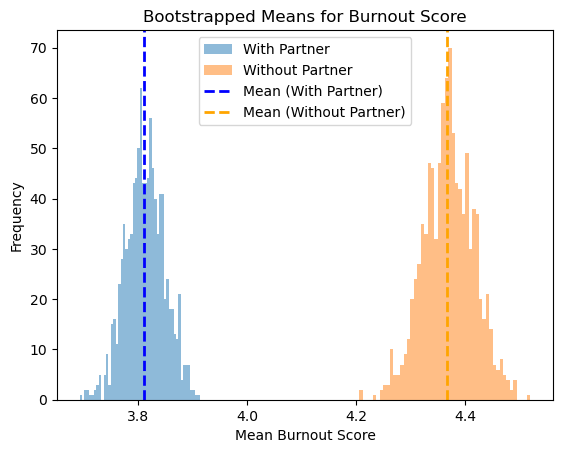

With Partner:
Mean: 3.81, 95% CI: [3.74366727 3.88388989]

Without Partner:
Mean: 4.37, 95% CI: [4.27429274 4.46005535]

P-value:
P-value: 0.0000


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, low_memory=False)

# Map the burnout scale to numeric values
burnout_mapping = {
    "Never": 1, 
    "Almost never": 2, 
    "Rarely": 3, 
    "Sometimes": 4, 
    "Often": 5, 
    "Very Often": 6, 
    "Always": 7
}

# Filter and preprocess data
df = df.dropna(subset=["GEO_housing_live_with_partner", "WELLNESS_malach_pines_burnout_measure_tired"])
df = df[df["WELLNESS_malach_pines_burnout_measure_tired"] != "Presented but no response"]
df["Burnout_Score"] = df["WELLNESS_malach_pines_burnout_measure_tired"].map(burnout_mapping)
df = df.dropna(subset=["Burnout_Score"])

# Separate data into groups
group_with_partner = df[df["GEO_housing_live_with_partner"] == 1]["Burnout_Score"]
group_without_partner = df[df["GEO_housing_live_with_partner"] == 0]["Burnout_Score"]

# Bootstrapping function
def bootstrap(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
bootstrap_with_partner = bootstrap(group_with_partner)
bootstrap_without_partner = bootstrap(group_without_partner)

# Calculate confidence intervals
ci_with_partner = np.percentile(bootstrap_with_partner, [2.5, 97.5])
ci_without_partner = np.percentile(bootstrap_without_partner, [2.5, 97.5])

# Perform p-value calculation (two-sample t-test)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_with_partner, group_without_partner, equal_var=False)

# Visualization
plt.hist(bootstrap_with_partner, bins=50, alpha=0.5, label="With Partner")
plt.hist(bootstrap_without_partner, bins=50, alpha=0.5, label="Without Partner")
plt.axvline(x=np.mean(group_with_partner), color='blue', linestyle='dashed', linewidth=2, label="Mean (With Partner)")
plt.axvline(x=np.mean(group_without_partner), color='orange', linestyle='dashed', linewidth=2, label="Mean (Without Partner)")
plt.legend()
plt.title("Bootstrapped Means for Burnout Score")
plt.xlabel("Mean Burnout Score")
plt.ylabel("Frequency")
plt.show()

print("With Partner:")
print(f"Mean: {np.mean(group_with_partner):.2f}, 95% CI: {ci_with_partner}")
print("\nWithout Partner:")
print(f"Mean: {np.mean(group_without_partner):.2f}, 95% CI: {ci_without_partner}")
print("\nP-value:")
print(f"P-value: {p_value:.4f}")


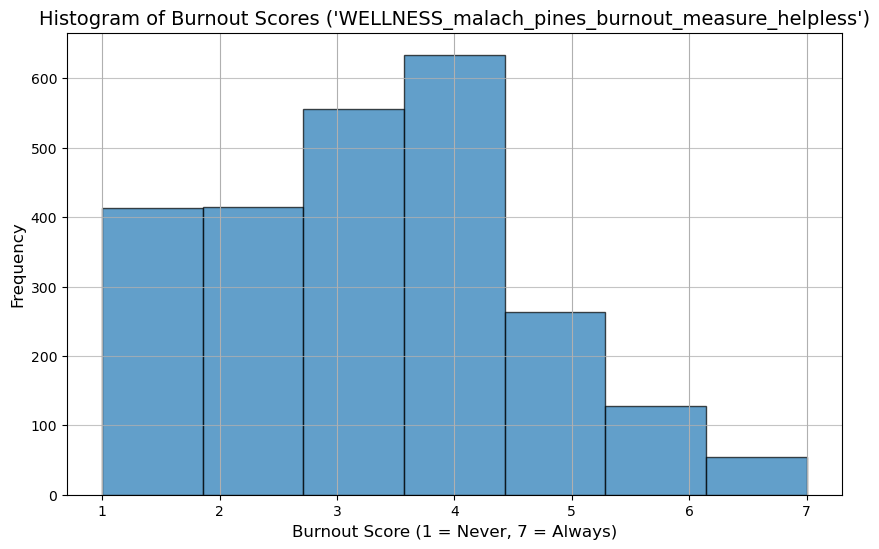

Summary Statistics for Burnout Scores:
count    2464.000000
mean        3.212256
std         1.517791
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Burnout_Score, dtype: float64


In [33]:
import matplotlib.pyplot as plt

# Create a histogram for the burnout scores
plt.figure(figsize=(10, 6))
df['Burnout_Score'].hist(bins=7, edgecolor='black', alpha=0.7)
plt.title("Histogram of Burnout Scores ('WELLNESS_malach_pines_burnout_measure_helpless')", fontsize=14)
plt.xlabel("Burnout Score (1 = Never, 7 = Always)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Summary statistics for burnout scores
burnout_summary = df['Burnout_Score'].describe()
print("Summary Statistics for Burnout Scores:")
print(burnout_summary)

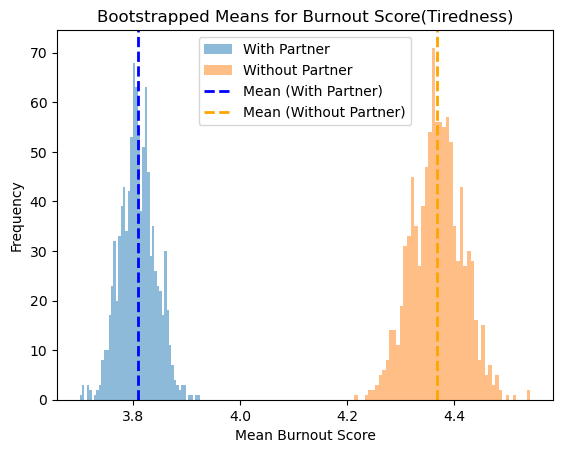

With Partner:
Mean: 3.81, 95% CI: [3.74726233 3.8718562 ]

Without Partner:
Mean: 4.37, 95% CI: [4.27675277 4.45759533]

P-value:
P-value: 0.0000


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, low_memory=False)

# Map the burnout scale to numeric values
burnout_mapping = {
    "Never": 1, 
    "Almost never": 2, 
    "Rarely": 3, 
    "Sometimes": 4, 
    "Often": 5, 
    "Very Often": 6, 
    "Always": 7
}

# Filter and preprocess data
df = df.dropna(subset=["GEO_housing_live_with_partner", "WELLNESS_malach_pines_burnout_measure_tired"])
df = df[df["WELLNESS_malach_pines_burnout_measure_tired"] != "Presented but no response"]
df["Burnout_Score"] = df["WELLNESS_malach_pines_burnout_measure_tired"].map(burnout_mapping)
df = df.dropna(subset=["Burnout_Score"])

# Separate data into groups
group_with_partner = df[df["GEO_housing_live_with_partner"] == 1]["Burnout_Score"]
group_without_partner = df[df["GEO_housing_live_with_partner"] == 0]["Burnout_Score"]

# Bootstrapping function
def bootstrap(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
bootstrap_with_partner = bootstrap(group_with_partner)
bootstrap_without_partner = bootstrap(group_without_partner)

# Calculate confidence intervals
ci_with_partner = np.percentile(bootstrap_with_partner, [2.5, 97.5])
ci_without_partner = np.percentile(bootstrap_without_partner, [2.5, 97.5])

# Perform p-value calculation (two-sample t-test)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_with_partner, group_without_partner, equal_var=False)

# Visualization
plt.hist(bootstrap_with_partner, bins=50, alpha=0.5, label="With Partner")
plt.hist(bootstrap_without_partner, bins=50, alpha=0.5, label="Without Partner")
plt.axvline(x=np.mean(group_with_partner), color='blue', linestyle='dashed', linewidth=2, label="Mean (With Partner)")
plt.axvline(x=np.mean(group_without_partner), color='orange', linestyle='dashed', linewidth=2, label="Mean (Without Partner)")
plt.legend()
plt.title("Bootstrapped Means for Burnout Score(Tiredness)")
plt.xlabel("Mean Burnout Score")
plt.ylabel("Frequency")
plt.show()

# Output results
print("With Partner:")
print(f"Mean: {np.mean(group_with_partner):.2f}, 95% CI: {ci_with_partner}")
print("\nWithout Partner:")
print(f"Mean: {np.mean(group_without_partner):.2f}, 95% CI: {ci_without_partner}")
print("\nP-value:")
print(f"P-value: {p_value:.4f}")

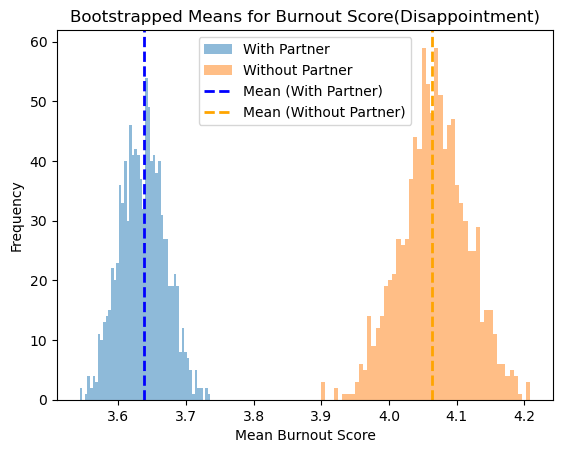

With Partner:
Mean: 3.64, 95% CI: [3.5736564  3.70051329]

Without Partner:
Mean: 4.06, 95% CI: [3.96782178 4.16215965]

P-value:
P-value: 0.0000


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, low_memory=False)

# Map the burnout scale to numeric values
burnout_mapping = {
    "Never": 1, 
    "Almost never": 2, 
    "Rarely": 3, 
    "Sometimes": 4, 
    "Often": 5, 
    "Very Often": 6, 
    "Always": 7
}

# Filter and preprocess data
df = df.dropna(subset=["GEO_housing_live_with_partner", "WELLNESS_malach_pines_burnout_measure_disappointed"])
df = df[df["WELLNESS_malach_pines_burnout_measure_disappointed"] != "Presented but no response"]
df["Burnout_Score"] = df["WELLNESS_malach_pines_burnout_measure_disappointed"].map(burnout_mapping)
df = df.dropna(subset=["Burnout_Score"])

# Separate data into groups
group_with_partner = df[df["GEO_housing_live_with_partner"] == 1]["Burnout_Score"]
group_without_partner = df[df["GEO_housing_live_with_partner"] == 0]["Burnout_Score"]

# Bootstrapping function
def bootstrap(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
bootstrap_with_partner = bootstrap(group_with_partner)
bootstrap_without_partner = bootstrap(group_without_partner)

# Calculate confidence intervals
ci_with_partner = np.percentile(bootstrap_with_partner, [2.5, 97.5])
ci_without_partner = np.percentile(bootstrap_without_partner, [2.5, 97.5])

# Perform p-value calculation (two-sample t-test)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_with_partner, group_without_partner, equal_var=False)

# Visualization
plt.hist(bootstrap_with_partner, bins=50, alpha=0.5, label="With Partner")
plt.hist(bootstrap_without_partner, bins=50, alpha=0.5, label="Without Partner")
plt.axvline(x=np.mean(group_with_partner), color='blue', linestyle='dashed', linewidth=2, label="Mean (With Partner)")
plt.axvline(x=np.mean(group_without_partner), color='orange', linestyle='dashed', linewidth=2, label="Mean (Without Partner)")
plt.legend()
plt.title("Bootstrapped Means for Burnout Score(Disappointment)")
plt.xlabel("Mean Burnout Score")
plt.ylabel("Frequency")
plt.show()

# Output results
print("With Partner:")
print(f"Mean: {np.mean(group_with_partner):.2f}, 95% CI: {ci_with_partner}")
print("\nWithout Partner:")
print(f"Mean: {np.mean(group_without_partner):.2f}, 95% CI: {ci_without_partner}")
print("\nP-value:")
print(f"P-value: {p_value:.4f}")

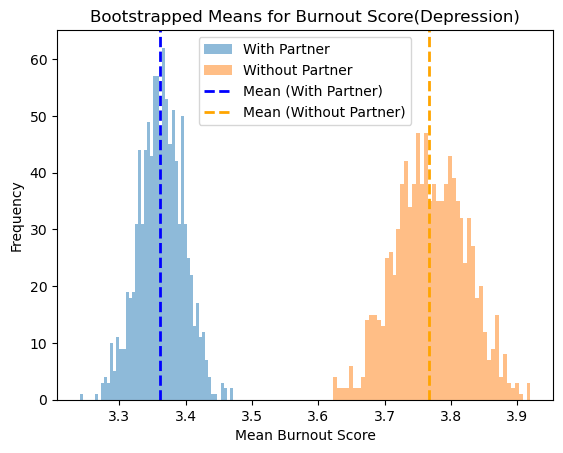

With Partner:
Mean: 3.36, 95% CI: [3.29431544 3.42882992]

Without Partner:
Mean: 3.77, 95% CI: [3.67077682 3.87176326]

P-value:
P-value: 0.0000


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, low_memory=False)

# Map the burnout scale to numeric values
burnout_mapping = {
    "Never": 1, 
    "Almost never": 2, 
    "Rarely": 3, 
    "Sometimes": 4, 
    "Often": 5, 
    "Very Often": 6, 
    "Always": 7
}

# Filter and preprocess data
df = df.dropna(subset=["GEO_housing_live_with_partner", "WELLNESS_malach_pines_burnout_measure_depressed"])
df = df[df["WELLNESS_malach_pines_burnout_measure_depressed"] != "Presented but no response"]
df["Burnout_Score"] = df["WELLNESS_malach_pines_burnout_measure_depressed"].map(burnout_mapping)
df = df.dropna(subset=["Burnout_Score"])

# Separate data into groups
group_with_partner = df[df["GEO_housing_live_with_partner"] == 1]["Burnout_Score"]
group_without_partner = df[df["GEO_housing_live_with_partner"] == 0]["Burnout_Score"]

# Bootstrapping function
def bootstrap(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
bootstrap_with_partner = bootstrap(group_with_partner)
bootstrap_without_partner = bootstrap(group_without_partner)

# Calculate confidence intervals
ci_with_partner = np.percentile(bootstrap_with_partner, [2.5, 97.5])
ci_without_partner = np.percentile(bootstrap_without_partner, [2.5, 97.5])

# Perform p-value calculation (two-sample t-test)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_with_partner, group_without_partner, equal_var=False)

# Visualization
plt.hist(bootstrap_with_partner, bins=50, alpha=0.5, label="With Partner")
plt.hist(bootstrap_without_partner, bins=50, alpha=0.5, label="Without Partner")
plt.axvline(x=np.mean(group_with_partner), color='blue', linestyle='dashed', linewidth=2, label="Mean (With Partner)")
plt.axvline(x=np.mean(group_without_partner), color='orange', linestyle='dashed', linewidth=2, label="Mean (Without Partner)")
plt.legend()
plt.title("Bootstrapped Means for Burnout Score(Depression)")
plt.xlabel("Mean Burnout Score")
plt.ylabel("Frequency")
plt.show()

# Output results
print("With Partner:")
print(f"Mean: {np.mean(group_with_partner):.2f}, 95% CI: {ci_with_partner}")
print("\nWithout Partner:")
print(f"Mean: {np.mean(group_without_partner):.2f}, 95% CI: {ci_without_partner}")
print("\nP-value:")
print(f"P-value: {p_value:.4f}")

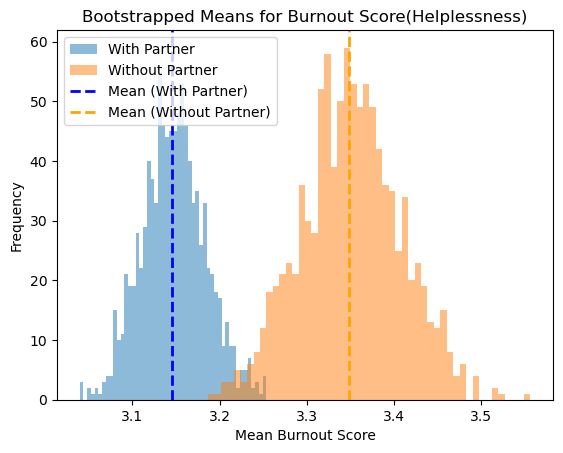

With Partner:
Mean: 3.15, 95% CI: [3.07988801 3.22580206]

Without Partner:
Mean: 3.35, 95% CI: [3.24261084 3.46059113]

P-value:
P-value: 0.0024


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, low_memory=False)

# Map the burnout scale to numeric values
burnout_mapping = {
    "Never": 1, 
    "Almost never": 2, 
    "Rarely": 3, 
    "Sometimes": 4, 
    "Often": 5, 
    "Very Often": 6, 
    "Always": 7
}

# Filter and preprocess data
df = df.dropna(subset=["GEO_housing_live_with_partner", "WELLNESS_malach_pines_burnout_measure_helpless"])
df = df[df["WELLNESS_malach_pines_burnout_measure_helpless"] != "Presented but no response"]
df["Burnout_Score"] = df["WELLNESS_malach_pines_burnout_measure_helpless"].map(burnout_mapping)
df = df.dropna(subset=["Burnout_Score"])

# Separate data into groups
group_with_partner = df[df["GEO_housing_live_with_partner"] == 1]["Burnout_Score"]
group_without_partner = df[df["GEO_housing_live_with_partner"] == 0]["Burnout_Score"]

# Bootstrapping function
def bootstrap(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
bootstrap_with_partner = bootstrap(group_with_partner)
bootstrap_without_partner = bootstrap(group_without_partner)

# Calculate confidence intervals
ci_with_partner = np.percentile(bootstrap_with_partner, [2.5, 97.5])
ci_without_partner = np.percentile(bootstrap_without_partner, [2.5, 97.5])

# Perform p-value calculation (two-sample t-test)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group_with_partner, group_without_partner, equal_var=False)

# Visualization
plt.hist(bootstrap_with_partner, bins=50, alpha=0.5, label="With Partner")
plt.hist(bootstrap_without_partner, bins=50, alpha=0.5, label="Without Partner")
plt.axvline(x=np.mean(group_with_partner), color='blue', linestyle='dashed', linewidth=2, label="Mean (With Partner)")
plt.axvline(x=np.mean(group_without_partner), color='orange', linestyle='dashed', linewidth=2, label="Mean (Without Partner)")
plt.legend()
plt.title("Bootstrapped Means for Burnout Score(Helplessness)")
plt.xlabel("Mean Burnout Score")
plt.ylabel("Frequency")
plt.show()

# Output results
print("With Partner:")
print(f"Mean: {np.mean(group_with_partner):.2f}, 95% CI: {ci_with_partner}")
print("\nWithout Partner:")
print(f"Mean: {np.mean(group_without_partner):.2f}, 95% CI: {ci_without_partner}")
print("\nP-value:")
print(f"P-value: {p_value:.4f}")